In [15]:
import os
import pandas as pd
from scipy import stats
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [16]:

os.chdir('C:\\Users\\Christian\\Documents\\GitHub\\Herramientas_Computacionales_IMEC3602\\02_taller01')

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')

ciudad1 = 'Sucre'
fuente1 = 'IDEAM'
ciudad2 = 'Sucre'
fuente2 = 'NREL'
ciudad3 = 'Medellin'
fuente3 = 'IDEAM'
ciudad4 = 'Medellin'
fuente4 = 'NREL'
ciudad5 = 'Uribia'
fuente5 = 'IDEAM'
ciudad6 = 'Uribia'
fuente6 = 'NREL'

serie_csv = os.path.join(base_dir,ciudad1,fuente1+'.csv')
serie_csv2 = os.path.join(base_dir,ciudad2,fuente2+'.csv')
serie_csv3 = os.path.join(base_dir,ciudad3,fuente3+'.csv')
serie_csv4 = os.path.join(base_dir,ciudad4,fuente4+'.csv')
serie_csv5 = os.path.join(base_dir,ciudad5,fuente5+'.csv')
serie_csv6 = os.path.join(base_dir,ciudad6,fuente6+'.csv')

serie_in= pd.read_csv(serie_csv, sep = ';',encoding='latin-1')
serie_in2= pd.read_csv(serie_csv2, sep = ';',encoding='latin-1')
serie_in3= pd.read_csv(serie_csv3, sep = ';',encoding='latin-1')
serie_in4= pd.read_csv(serie_csv4, sep = ';',encoding='latin-1')
serie_in5= pd.read_csv(serie_csv5, sep = ';',encoding='latin-1')
serie_in6= pd.read_csv(serie_csv6, sep = ';',encoding='latin-1')

rang_anio=numpy.arange(2006,2016)
serie_in2=serie_in2[serie_in2['AÑO'].isin(rang_anio)]
serie_in4=serie_in4[serie_in4['AÑO'].isin(rang_anio)]
serie_in6=serie_in6[serie_in6['AÑO'].isin(rang_anio)]



In [17]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) & (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)& (serie_horaria["MES"] == mes)),nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],"GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df


def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno) & (serie_ghi_mensual["MES"] == mes)),"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)& (serie_ghi_mensual["MES"] == mes)),"GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

para la realizacion de las funciones requeridas en el punto 1 y 2 es necesario de cierta manera organizar la ENFICC de menor a mayor por lo que antes de generar el codigo de estas funciones se realiza una funcion de apoyo que realice este procedimiento y que pueda ser llamada en ambos casos

In [18]:
def func_sort (serie_int):#funcion para ordenar la enfic de mayor a menor 
 mensual=ghi_mensual(serie_int)#utilza la funcion ghi_mensual para encontrar el promedio mensual 
 diario=ghi_dia(mensual)#utilia la funcion ghi_dia para encontrar el promedio diario 
 enficc_ord = sorted(diario["GHIdiario"])#ordena los valores de promedio diario de menor a mayor en una lista
 return enficc_ord
 

##Punto 1
para generar la funcion del punto 1 se utiliza la funcion func_sort antes generada para organizar la ENFICC de la serie de datos que ingresa por parametro. despues se utiliza el comando percentile para encontrar la ENFICC que es superada por el 99% de los valores.

In [19]:
def func_punto_1 (serie_int):
 lista_enficc=func_sort(serie_int)
 percentil=numpy.percentile(lista_enficc,1)
 resp=numpy.around(percentil, decimals=2)#establece un valor de dos cifras cignificativas para el percentil
 print('La ENFICC correspondiente al 99% es',resp, 'kw/h')
 return resp

func_punto_1(serie_in)#codigo de prueba

La ENFICC correspondiente al 99% es 2.38 kw/h


2.3799999999999999

##Punto 2
Para generar la funcion del segundo punto nuevamente se utiliza func_sort para organizar la ENFICC de cada una de las series de datos que ingresen. Dado que no se especifica una cantidad exacta de series de datos como entrada a la funcion se utiliza un parametro de entrada abierto que permite ingresar la cantidad de series deseadas, para luego usando un if graficar la ENFICC de cada una de ellas

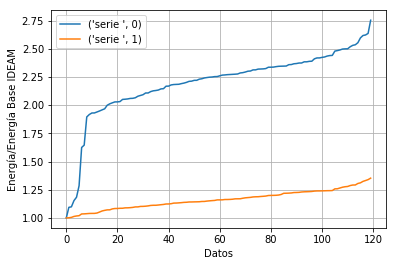

In [20]:
def func_punto_2(*arg):
 rango=numpy.arange(0,len(arg))#se determina el numero de series a graficar
 for i in rango:#se genera un if que recorra cada una de las funciones
  datos=func_sort (arg[i])#se define datos como la ENFICC organizada de la serie numero i ingresada como parametro
  numdatos = range(len(datos))#se determina el numero de datos que se tienen para la ENFICC de la serie numero i
  pylab.plot(numdatos,datos/datos[0],label=('serie ',i))# se grafica los datos de ENFICC contra el numero de datos, se le asigan el label #1
 pylab.legend(loc='upper left')  
 pylab.xlabel("Datos")
 pylab.ylabel("Energía/Energía Base IDEAM")
 plt.grid()

func_punto_2(serie_in,serie_in2)#codigo de prueba de la funcion


Para probar la funcion a realizar en el punto 3 y como una herramienta util en el analisis a realizar en el punto 5 se genera una funcion que extraiga de una serie de datos los datos para un año especifico y de una longitud en meses dada, esta fucnion se presenta a continuacion

In [21]:
def func_selec(df,meses,anio):  
 if meses>12:
   anio_2=(anio+1)
   meses_1=12
   meses_2=meses-12
   range_meses2=numpy.arange(1,(meses_2+1))
   serie_selec2=df.loc[df['MES'].isin(range_meses2) & (df['AÑO'] == anio_2)]
 else:
  meses_1=meses
 
 rang_meses=numpy.arange(1,(meses_1+1))# se genera un arreglo con los numeros de meses desde el mes 1 hasta el numero de mes parametro mas 1
 serie_selec=df.loc[df['MES'].isin(rang_meses) & (df['AÑO'] == anio)]#se seleccionan los datos datos que cumplen con las condiciones
 
 if meses>12:
  serie_selec=pd.concat([serie_selec,serie_selec2])
 return (serie_selec)

obj=func_selec(serie_in,16,2006)#codigo de prueba


##Punto 3
para realizar el ajuste de la serie de largo plazo la funcion comienza por establecer a que año y a que meses corresponde la serie de datos de corto plazo medida en el sitio y usando la funcion func_selec selecciona los datos que corresponden a la misma temporalidad de la serie de largo plazo a ser ajustada.
Una vez realizado el procedmiento anterior la funcion calcula las varianzas y los valores medios de las series de referencia y de objetivo para luego utilizando las ecuaciones establecidas en la seccion 3.1.4 del documento realizar el ajuste de la serie de datos de largo plazo.

In [22]:
def func_punto_3(serie_ref,serie_obj):
 anios = sorted(serie_obj['AÑO'].unique())#se genera una lista con los años presentes en la serie de corto plazo (se asume que solo hay un año)
 meses = sorted(serie_obj['MES'].unique())#se genera una lista con los meses presentes en la serie de corto plazo
 anio=anios[0]
 if len(anios)>1:
   serie_seg=serie_obj.loc[(serie_obj['AÑO'] == (anio+1))]
   meses2 = sorted(serie_seg['MES'].unique())
   mes=12+meses2[-1]
 else:
   mes=meses[-1]
                     
 serie_ref2=func_selec(serie_ref,mes,anio)#se seleccionan los datos de la serie a ajustar para la misma temporalidad 
 serie_corr=serie_ref
 lista_ref=np.asarray(list(serie_ref.T.iloc[-1]))#los datos de la serie de referencia se convierte a una lista
 lista_ref2 =np.asarray(list(serie_ref2.T.iloc[-1]))#los datos de la serie de referencia en misma temporalidad se convierte a una lista
 lista_obj = np.asarray(list(serie_obj.T.iloc[-1]))#los datos de energia de la serie de objetivo se convierte a una lista
 sigma_obj=np.std(lista_obj)#desviacion estandar de la lista objetivo
 sigma_ref2=np.std(lista_ref2)#desviacion estandar de la lista referencia
 med_obj=np.average(lista_obj)#media de la lista objetivo
 med_ref2=np.average(lista_ref2)#media de la lista referencia
 c=med_obj-(med_ref2*sigma_obj/sigma_ref2)#calculo de parametro c
 m=sigma_obj/sigma_ref2#calculo parametro m
 lista_corr=((m*lista_ref)+c)#se genera una lista con los valores de energia corregidos 
 serie_corr[-1]=lista_corr#se asigna la lista con los valores corregidos a la serie corregida
 return (serie_corr)
    
corr=func_punto_3(serie_in2,obj)



##Punto 4
las funciones de error se generan utilizando las ecuaciones presentadas en la seccion 3.1.2 del documento

###Funcion para calculo de la RMSEn

In [23]:
def rmsn(obs,mod):
  lista_obs=np.asarray(list(obs.T.iloc[-1]))#se genera un arreglo con los valores de energia de la serie obs
  lista_mod=np.asarray(list(mod.T.iloc[-1]))#se genera un arreglo con los valores de energia de la rerie mod
  n=len(lista_obs)#se determina el numero total de datos
  rest=lista_obs-lista_mod#se realiza el procesamiento matematico establecido
  prom=np.sqrt((np.sum(rest**2))/n)
  obs_max=np.amax(lista_obs)
  resp=100*prom/obs_max
  return(resp)

rmsn(serie_in,corr)#codigo de prueba de la funcion

11.008020079116612

###Funcion para calculo de la MBE

In [24]:
def mbe(obs,mod):
  lista_obs=np.asarray(list(obs.T.iloc[-1]))#se genera un arreglo con los valores de energia de la serie obs
  lista_mod=np.asarray(list(mod.T.iloc[-1]))#se genera un arreglo con los valores de energia de la rerie mod
  rest=np.sum(lista_obs-lista_mod)#se realiza el procesamiento matematico establecido
  tot=np.sum(lista_obs)
  resp=100*rest/tot
  return(resp)

mbe(serie_in,corr)

-4.7421091522668872

###Funcion para calculo de la "KSI"

In [25]:
def ksi(obs,mod):
 ser_obs=func_sort(obs)
 ser_mod=func_sort(mod)
 dat=stats.ks_2samp(ser_obs,ser_mod)
 resp=dat[-1]
 return(resp)

ksi(serie_in,corr)

0.088884517408836211

In [32]:
num_meses=24##lineas de codigo a usar para las graficas del analisis
meses=linspace(1,num_meses,num_meses)
meses=meses.astype(int)
ser_rmsn1=np.zeros(num_meses)
ser_mbe1=np.zeros(num_meses)
ser_ksi1=np.zeros(num_meses)
ser_rmsn2=np.zeros(num_meses)
ser_mbe2=np.zeros(num_meses)
ser_ksi2=np.zeros(num_meses)
ser_rmsn3=np.zeros(num_meses)
ser_mbe3=np.zeros(num_meses)
ser_ksi3=np.zeros(num_meses)
for i in meses:
 obje1=func_selec(serie_in,i,2012)
 obje2=func_selec(serie_in3,i,2012)
 obje3=func_selec(serie_in5,i,2012)
 correg1=func_punto_3(serie_in2,obje1)
 correg2=func_punto_3(serie_in4,obje2)
 correg3=func_punto_3(serie_in6,obje3)
 ser_rmsn1[i-1]=rmsn(correg1,serie_in)
 ser_mbe1[i-1]=mbe(correg1,serie_in)
 ser_ksi1[i-1]=ksi(correg1,serie_in)
 ser_rmsn2[i-1]=rmsn(correg2,serie_in3)
 ser_mbe2[i-1]=mbe(correg2,serie_in3)
 ser_ksi2[i-1]=ksi(correg2,serie_in3)
 ser_rmsn3[i-1]=rmsn(correg3,serie_in5)
 ser_mbe3[i-1]=mbe(correg3,serie_in5)
 ser_ksi3[i-1]=ksi(correg3,serie_in5)

 

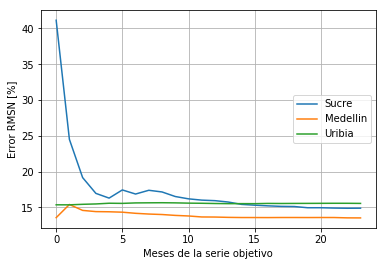

In [33]:
pylab.plot(ser_rmsn1,label='Sucre')
pylab.plot(ser_rmsn2,label='Medellin')
pylab.plot(ser_rmsn3,label='Uribia')
pylab.legend(loc='center right')  
pylab.xlabel("Meses de la serie objetivo")
pylab.ylabel("Error RMSN [%]")
plt.grid()
pylab.savefig(os.path.join(output_dir,'RMSN.png'), dpi=600)

#Punto 5-Analisis

##Indicadores de error respecto a la cantidad de meses

###error RMSEn

<img src="RMSN.png">

Las gráficas anteriores presentan el comportamiento de los tres indicadores de error de la serie corregida respecto al número de meses de la serie objetivo con el propósito de poder establecer consideraciones frente a la influencia del número de meses sobre estos indicadores.
Respecto al indicador de RMSEn en las tres ciudades analizadas se puede apreciar un comportamiento distinto en cada una de estas conforme la serie objetivo crece de 1 a 5 meses, por ejemplo, para Medellín el error es mínimo para una serie objetivo de 1 mes y aumenta hasta un máximo de error en el tercer mes para luego caer nuevamente.
Para Uribia el error empieza desde un mínimo y aumenta ligeramente conforme aumenta el número de meses, y en el caso de Sucre el error comienza en un valor elevado y disminuye rápidamente conforme aumenta el número de meses de la serie objetivo.
Lo anterior muestra que conforme aumenta el número de meses de la serie objetivo para un rango de entre 1 y 6 meses el comportamiento del error no es predecible, lo que podría ser causado por el poco número de datos con los que se cuenta y dependiendo de la ciudad que tan cambiante puede ser el clima en un periodo más largo de tiempo.
Sin embargo, en comparación a lo anterior una vez la serie objetivo tiene una duración de entre 10 y 12 meses en adelante el error tiende a mantener un valor constante sin consideración de la ciudad o el comportamiento impredecible del error para series con menor cantidad de meses.
Lo anterior permite concluir que a pesar de que en ocasiones el error obtenido con series referencia cortas pueda ser menor que con series largas este no es un comportamiento constante o repetible por lo que no sería adecuado el uso de este tipo de series. Por el contrario, sería adecuado el uso de series referencia de entre 10 y 12 meses para las cuales el error se disminuye y tiene un comportamiento constante independiente de la ciudad.
También se puede apreciar como requerir una serie objetivo con duración mayor a 12 meses no representa un beneficio significativo en la disminución del error puesto que este varia muy levemente. 

